## 1. Import Libraries

In [1]:
from MongoDataLoad.MongoDB_config import CLIENT_URL, DB_NAME, COLL_NAME, FILE_PATH
from MongoDataLoad.PyMongoDB import PyMongoDatabase, PyMongoDbOperations, PyMongoDbFindFilter, PyMongoDbDropColl
from MongoDataLoad.LoadFileData import PyMongoBulkLoad

import logging
logging.basicConfig(filename="App.log", level=logging.DEBUG, format='%(asctime)s %(levelname)s %(message)s')

## 2. Create Objects

In [2]:
logging.info("-------#####   Application Started   #####--------")

In [3]:
carbon_coll = PyMongoDbOperations(CLIENT_URL, DB_NAME, COLL_NAME)
carbon = PyMongoDbDropColl(CLIENT_URL, DB_NAME, COLL_NAME)

### 2.1 DB Connectivity check

In [4]:
carbon_coll.connectivity_check()

## 3. DB Operations

### 3.1 Load the CSV file to Pandas Dataframe

In [5]:
file_data = PyMongoBulkLoad(FILE_PATH)
data = file_data.load_pandas_df()

### 3.2 Insert or Load CSV file to Mongo DB

In [6]:
carbon_coll.insert_many(data)

In [9]:
# /*pass empty query to get the count of all records
query={}
count = carbon_coll.get_doc_count(query)

In [10]:
print(f"Total documents in the collection : {count}")

Total documents in the collection : 10721


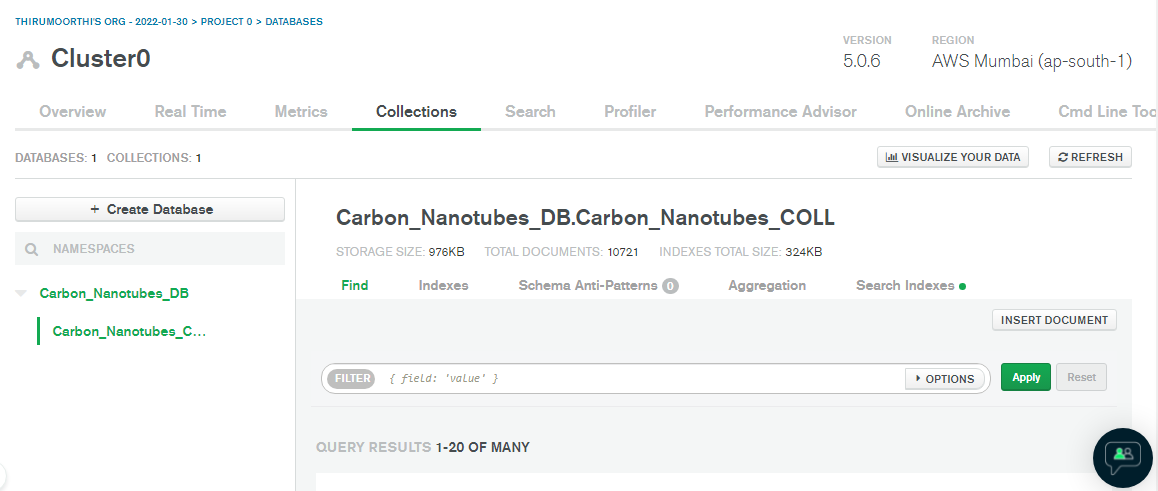 


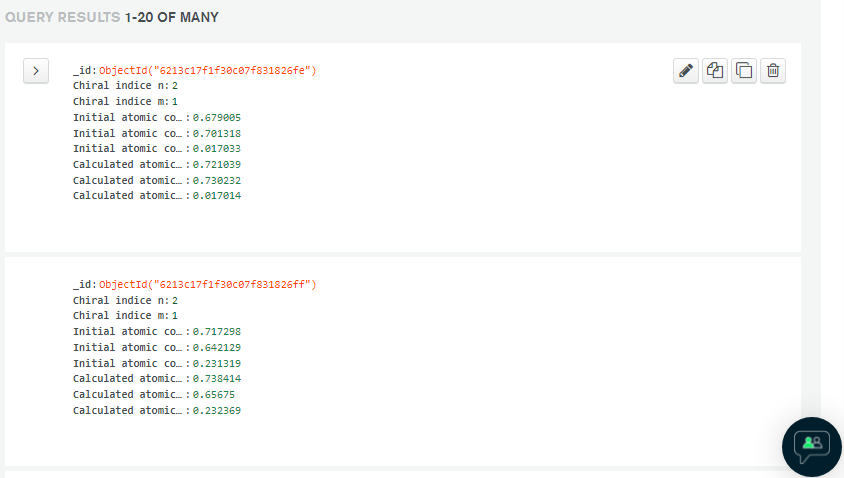

### 3.3 Insert single documents to Collection

In [11]:
data1 = {
    'Chiral indice n': 1,
    'Chiral indice m': 1,
    'Initial atomic coordinate u': 0.666666,
    'Initial atomic coordinate v': 0.777777,
    'Initial atomic coordinate w': 0.010101,
    "Calculated atomic coordinates u'": 0.727272,
    "Calculated atomic coordinates v'": 0.733333,
    "Calculated atomic coordinates w'": 0.010203
        }

data2 = {
    'Chiral indice n': 1,
    'Chiral indice m': 2,
    'Initial atomic coordinate u': 0.333333,
    'Initial atomic coordinate v': 0.111111,
    'Initial atomic coordinate w': 0.020201,
    "Calculated atomic coordinates u'": 0.525252,
    "Calculated atomic coordinates v'": 0.711111,
    "Calculated atomic coordinates w'": 0.012345
        }

data3 = {
    'Chiral indice n': 13,
    'Chiral indice m': 1,
    'Initial atomic coordinate u': 0.123456,
    'Initial atomic coordinate v': 0.111111,
    'Initial atomic coordinate w': 0.030303,
    "Calculated atomic coordinates u'": 0.626262,
    "Calculated atomic coordinates v'": 0.737373,
    "Calculated atomic coordinates w'": 0.010203
        }

In [12]:
carbon_coll.insert_one_doc(data1)

In [13]:
carbon_coll.insert_one_doc(data2)

In [14]:
carbon_coll.insert_one_doc(data3)

In [15]:
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 1)

,_id,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,6213c32c1f30c07f831850df,1,1,0.666666,0.777777,0.010101,0.727272,0.733333,0.010203
1,6213c32d1f30c07f831850e0,1,2,0.333333,0.111111,0.020201,0.525252,0.711111,0.012345


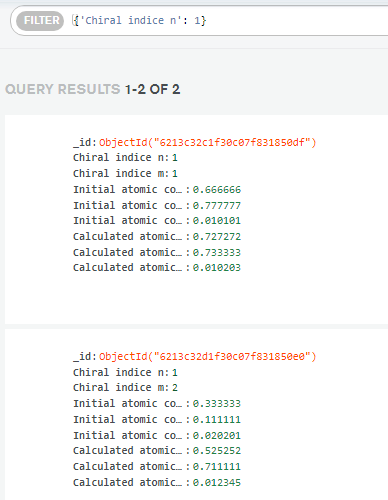

In [16]:
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 13)

,_id,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,6213c32e1f30c07f831850e1,13,1,0.123456,0.111111,0.030303,0.626262,0.737373,0.010203


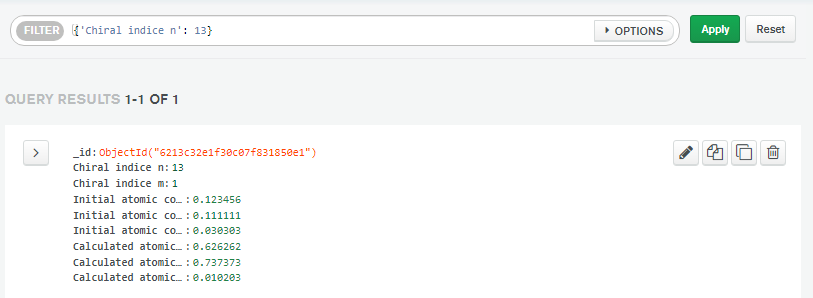

### 3.4 Update many documents in Collection

In [17]:
query = {"Chiral indice n": { "$eq" : 1}}
column = "Chiral indice n"
new_val = 16

carbon_coll.update_many(query, column, new_val)

In [18]:
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 16)

,_id,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,6213c32c1f30c07f831850df,16,1,0.666666,0.777777,0.010101,0.727272,0.733333,0.010203
1,6213c32d1f30c07f831850e0,16,2,0.333333,0.111111,0.020201,0.525252,0.711111,0.012345


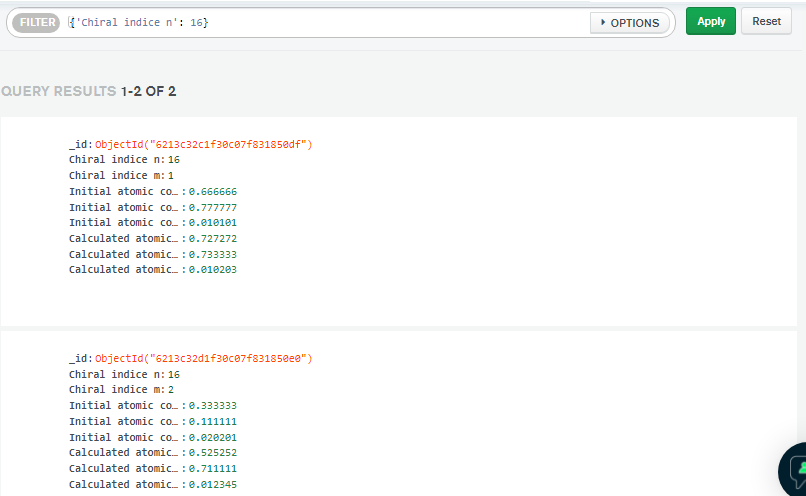

### 3.5 Update single document in Collection

In [19]:
query = {"Chiral indice n": { "$eq" : 13}}
column = "Chiral indice n"
new_val = 17

carbon_coll.update_one(query, column, new_val)

In [20]:
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 17)

,_id,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,6213c32e1f30c07f831850e1,17,1,0.123456,0.111111,0.030303,0.626262,0.737373,0.010203


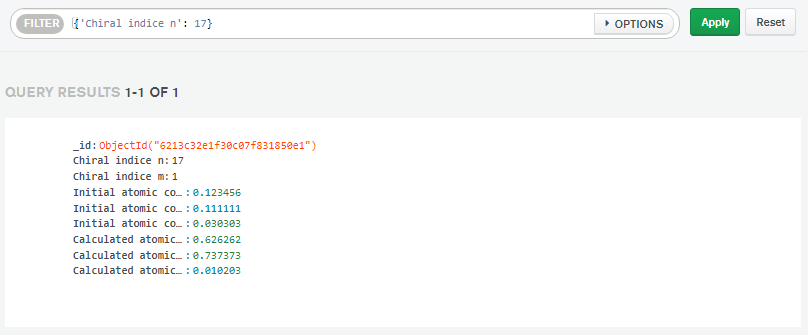

### 3.6 Find One and Update in Collection

In [21]:
query = {"Chiral indice n": { "$eq" : 17}}
column = "Chiral indice n"
new_val = 18

carbon_coll.find_one_and_update(query, column, new_val)

In [22]:
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 18)

,_id,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,6213c32e1f30c07f831850e1,18,1,0.123456,0.111111,0.030303,0.626262,0.737373,0.010203


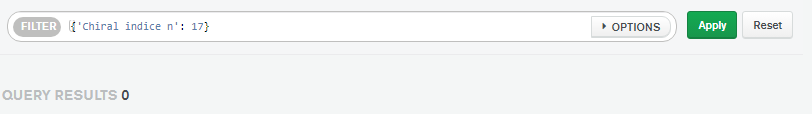


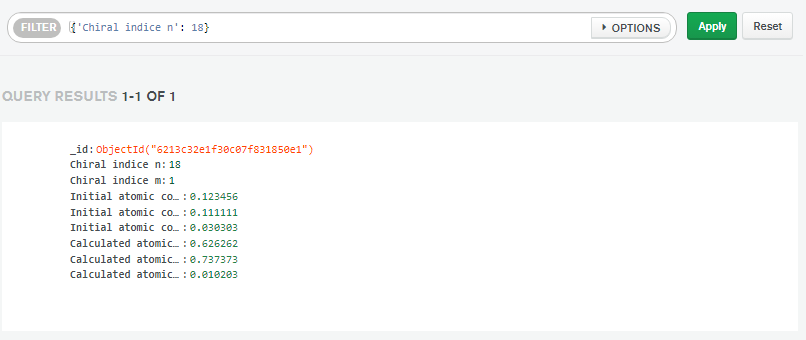

### 3.7 Delete many documents from DB Collection

In [23]:
query = {"Chiral indice n": { "$eq" : 16}}
carbon_coll.delete_many(query)

In [24]:
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 16)

""


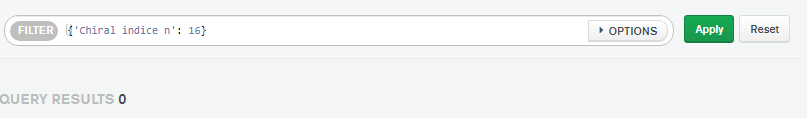

### 3.8 Delete Single document from DB Collection

In [25]:
query = {"Chiral indice n": { "$eq" : 18}}
carbon_coll.delete_one(query)

In [26]:
carbon_coll.find_doc(column = "Chiral indice n", operator= '$eq', value = 18)

""


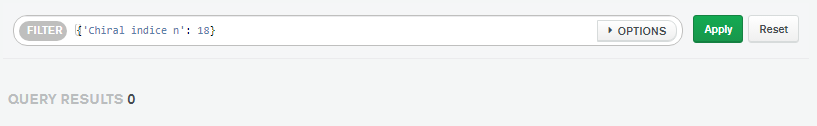

## 4. Find and Filter Operations

### 4.1 Find all the documents

In [27]:
carbon_coll.find_all()

,_id,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,6213c17f1f30c07f831826fe,2,1,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,6213c17f1f30c07f831826ff,2,1,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,6213c17f1f30c07f83182700,2,1,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,6213c17f1f30c07f83182701,2,1,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,6213c17f1f30c07f83182702,2,1,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373
...,...,...,...,...,...,...,...,...,...
10716,6213c17f1f30c07f831850da,12,6,0.834201,0.399891,0.891270,0.841858,0.405882,0.891356
10717,6213c17f1f30c07f831850db,12,6,0.698374,0.244710,0.962699,0.706555,0.248416,0.962833
10718,6213c17f1f30c07f831850dc,12,6,0.923823,0.568913,0.819842,0.929403,0.576284,0.819879
10719,6213c17f1f30c07f831850dd,12,6,0.934978,0.602319,0.938889,0.941844,0.610608,0.938755


### 4.2 Get the count of documents in Collection

In [28]:
# /*pass empty query to get the count of all records
query={}
count = carbon_coll.get_doc_count(query)
print(f"Total documents in the collection : {count}")

Total documents in the collection : 10721


### 4.3 Get the first n documents from Collection

In [29]:
# We pass the limit as 2 to get the first 2 documents
carbon_coll.get_doc_limit(2)

,_id,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,6213c17f1f30c07f831826fe,2,1,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,6213c17f1f30c07f831826ff,2,1,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369


### 4.4 Filter the collection with logical AND operation

In [30]:
query1 = {"Chiral indice n": { "$eq" : 2}}
query2 = {"Chiral indice m": { "$eq" : 1}}

carbon_coll.filter_with_and(query1, query2)

,_id,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,6213c17f1f30c07f831826fe,2,1,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,6213c17f1f30c07f831826ff,2,1,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,6213c17f1f30c07f83182700,2,1,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,6213c17f1f30c07f83182701,2,1,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,6213c17f1f30c07f83182702,2,1,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373
5,6213c17f1f30c07f83182703,2,1,0.510664,0.696249,0.255128,0.496977,0.725608,0.255970
6,6213c17f1f30c07f83182704,2,1,0.413957,0.632996,0.374176,0.390878,0.657645,0.374735
7,6213c17f1f30c07f83182705,2,1,0.712552,0.554790,0.112271,0.750056,0.561494,0.114944
8,6213c17f1f30c07f83182706,2,1,0.320995,0.298682,0.183700,0.281301,0.261433,0.182779
9,6213c17f1f30c07f83182707,2,1,0.394742,0.279367,0.302747,0.350860,0.233500,0.302196


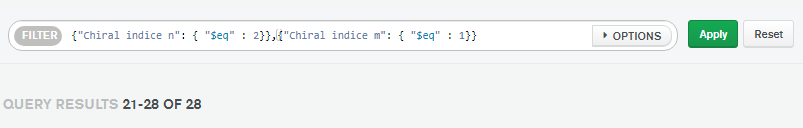

### 4.5 Filter the collection with logical OR operation

In [31]:
query1 = {"Chiral indice n": { "$eq" : 2}}
query2 = {"Chiral indice m": { "$eq" : 1}}

carbon_coll.filter_with_or(query1, query2)

,_id,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,6213c17f1f30c07f831826fe,2,1,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,6213c17f1f30c07f831826ff,2,1,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,6213c17f1f30c07f83182700,2,1,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,6213c17f1f30c07f83182701,2,1,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,6213c17f1f30c07f83182702,2,1,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373
...,...,...,...,...,...,...,...,...,...
1782,6213c17f1f30c07f8318467e,10,1,0.430885,0.114842,0.960765,0.427237,0.106885,0.961021
1783,6213c17f1f30c07f8318467f,10,1,0.442369,0.119030,0.992296,0.438203,0.111751,0.992531
1784,6213c17f1f30c07f83184680,10,1,0.849876,0.488675,0.951756,0.853058,0.489306,0.951546
1785,6213c17f1f30c07f83184681,10,1,0.855822,0.500297,0.983287,0.858856,0.501019,0.983032


## 5. Drop the collection from DB

In [32]:
carbon.drop_collection()

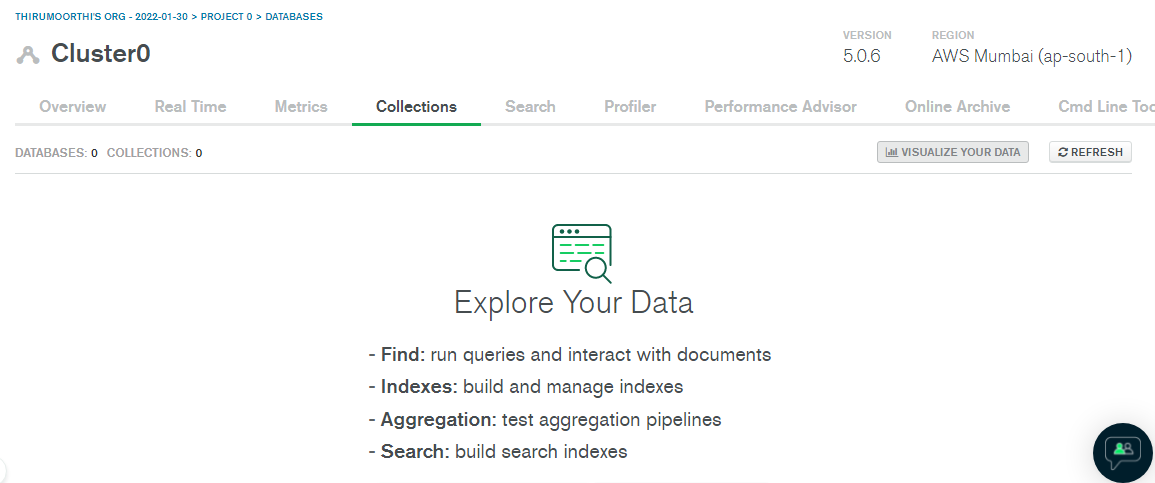

In [33]:
logging.info("-------#####   Application END   #####--------")